In [1]:
import healpy as hp
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as mb
import numpy as np
import os
from mafContrib.LSSObsStrategy.galaxyCountsMetric_extended import GalaxyCountsMetric_extended
from lsst.sims.maf.metrics.snCadenceMetric import SNCadenceMetric
from lsst.sims.maf.metrics.snSNRMetric import SNSNRMetric
from lsst.sims.featureScheduler.surveys import generate_dd_surveys
from lsst.sims.maf.utils.snUtils import Lims, ReferenceData
from lsst.sims.utils import hpid2RaDec, angularSeparation

import lsst.sims.maf.db as db

/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
name = 'templates_w_2.0_1exp_pairsmix_10yrs'
resultsDb = db.ResultsDb(outDir=name)
opsdb = db.OpsimDatabaseV4(name+'.db')
#opsdb = db.OpsimDatabaseV4('../baselines/baseline_1exp_pairsmix_10yrs.db')

In [3]:
bundleList = []
displayDict = {'group': 'SRD', 'subgroup': 'Gaps', 'order': 0, 'caption': None}
plotDict = {'percentileClip': 95.}
nside=64
healslicer = slicers.HealpixSlicer(nside=nside)
subsetPlots = [plots.HealpixSkyMap(), plots.HealpixHistogram()]

for filtername in 'ugrizy':
    sql ='filter ="%s"' % filtername
    metric = metrics.MaxGapMetric()
    summaryMetrics = [metrics.PercentileMetric(percentile=98, metricName='98th percentile of Max gap, %s' % filtername)]
    bundle = mb.MetricBundle(metric, healslicer, sql, plotFuncs=subsetPlots,
                             summaryMetrics=summaryMetrics, displayDict=displayDict, plotDict=plotDict)
    bundleList.append(bundle)
    displayDict['order'] += 1

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


Querying database SummaryAllProps with constraint filter ="r" for columns ['observationStartMJD', 'fieldRA', 'fieldDec']
Found 492516 visits
Running:  ['opsim_MaxGap_observationStartMJD_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter ="z" for columns ['observationStartMJD', 'fieldRA', 'fieldDec']
Found 456476 visits
Running:  ['opsim_MaxGap_observationStartMJD_z_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter ="i" for columns ['observationStartMJD', 'fieldRA', 'fieldDec']
Found 473919 visits
Running:  ['opsim_MaxGap_observationStartMJD_i_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter ="u" for columns ['observationStartMJD', 'fieldRA', 'fieldDec']
Found 159454 visit

/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 1315 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Plotting complete.
Plotting figures with "filter ="z"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 909 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Plotting complete.
Plotting figures with "filter ="i"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 778 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Plotting complete.
Plotting figures with "filter ="u"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 1268 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Plotting complete.
Plotting figures with "filter ="g"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 673 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Plotting complete.
Plotting figures with "filter ="y"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 1384 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Plotting complete.


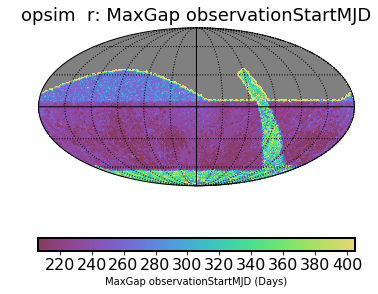

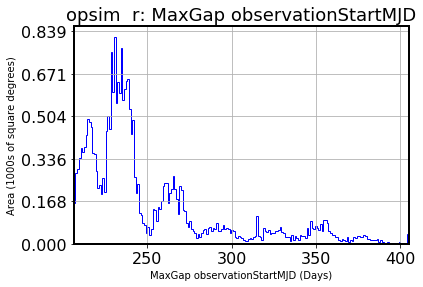

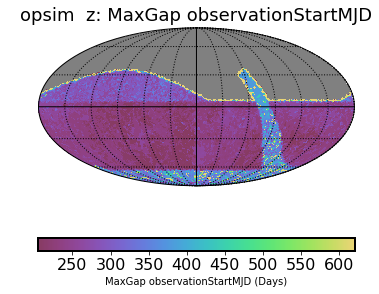

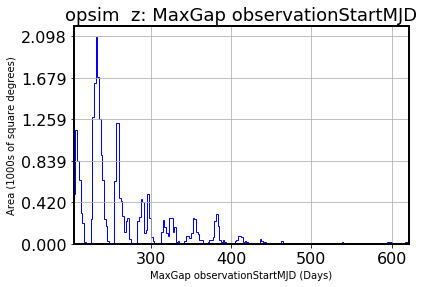

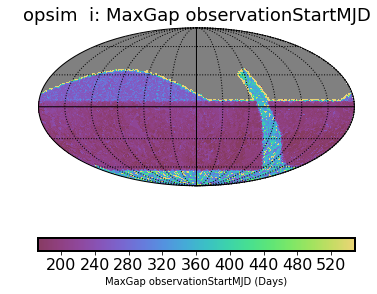

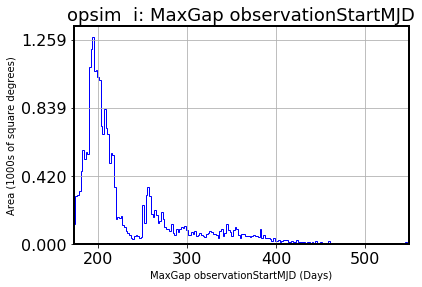

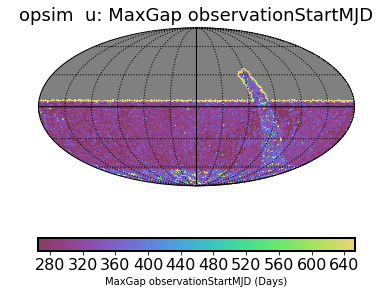

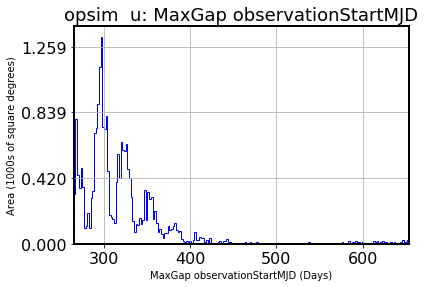

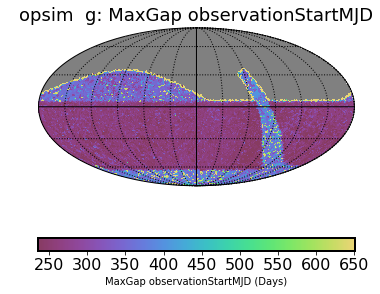

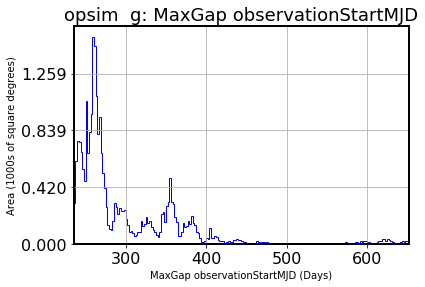

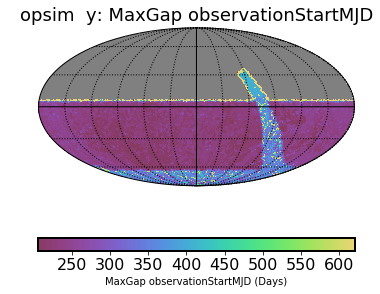

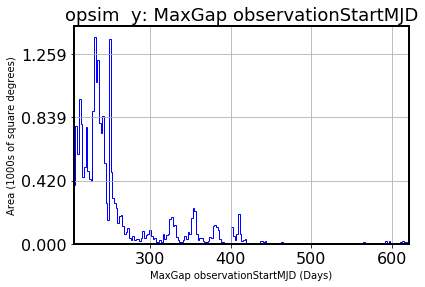

In [4]:
bd = mb.makeBundlesDictFromList(bundleList)
group = mb.MetricBundleGroup(bd, opsdb, outDir=name, resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)


In [5]:
for bundle in bundleList:
    print(bundle.summaryValues)

{'98th percentile of Max gap, u': 695.42101187516187}
{'98th percentile of Max gap, g': 682.2289787361816}
{'98th percentile of Max gap, r': 440.81607827882391}
{'98th percentile of Max gap, i': 598.34704098380462}
{'98th percentile of Max gap, z': 654.14665117092864}
{'98th percentile of Max gap, y': 661.43301836697947}


Querying database SummaryAllProps with constraint filter ="r" for columns ['observationStartMJD', 'fieldRA', 'fieldDec']
Found 494229 visits
Running:  ['opsim_MaxGap_observationStartMJD_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter ="z" for columns ['observationStartMJD', 'fieldRA', 'fieldDec']
Found 458710 visits
Running:  ['opsim_MaxGap_observationStartMJD_z_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter ="i" for columns ['observationStartMJD', 'fieldRA', 'fieldDec']
Found 475454 visits
Running:  ['opsim_MaxGap_observationStartMJD_i_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter ="u" for columns ['observationStartMJD', 'fieldRA', 'fieldDec']
Found 160469 visit

/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 765 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Plotting complete.
Plotting figures with "filter ="z"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 599 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Plotting complete.
Plotting figures with "filter ="i"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 586 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Plotting complete.
Plotting figures with "filter ="u"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 1414 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Plotting complete.
Plotting figures with "filter ="g"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 569 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Plotting complete.
Plotting figures with "filter ="y"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 1192 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Plotting complete.


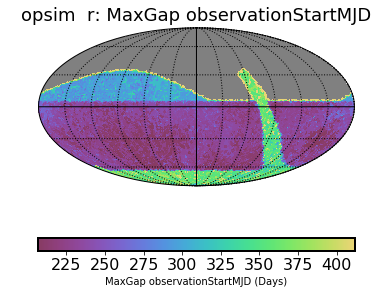

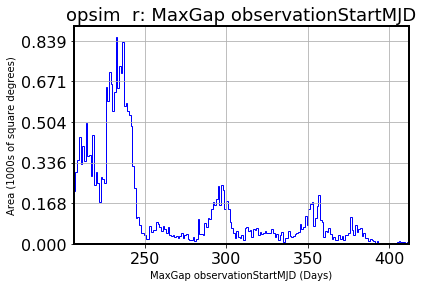

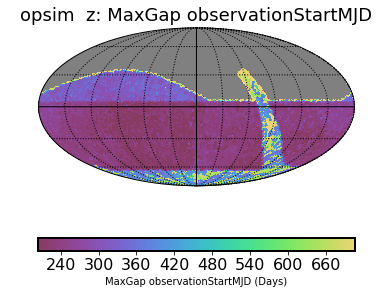

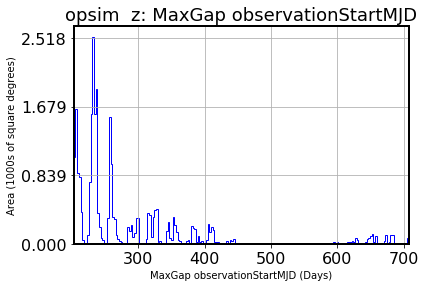

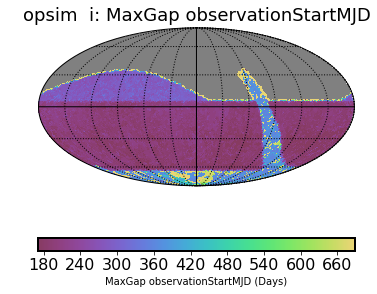

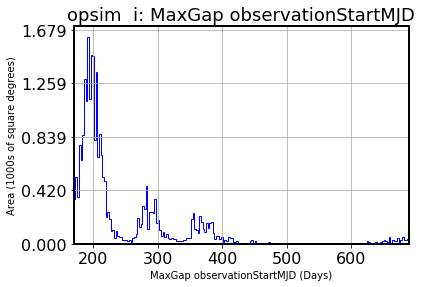

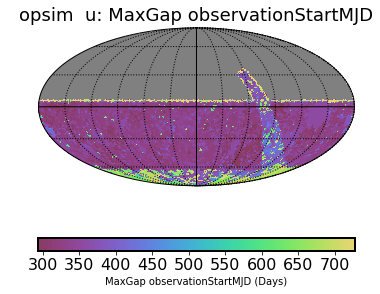

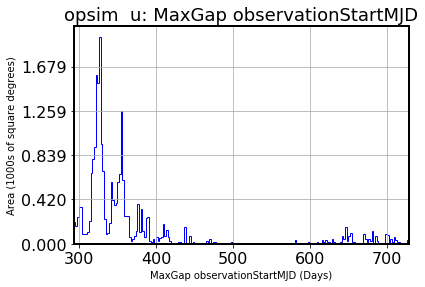

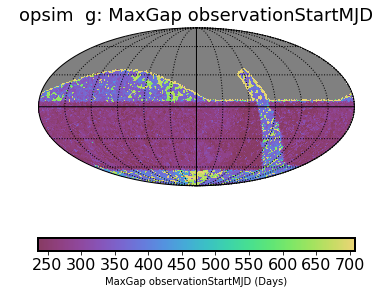

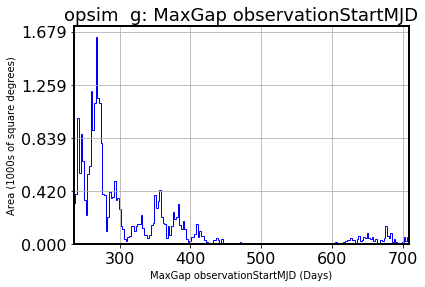

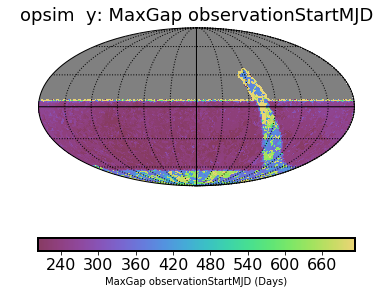

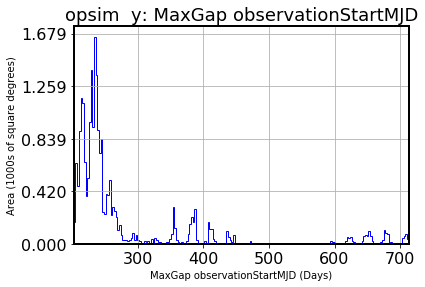

In [6]:
name = 'templates_1exp_pairsmix_10yr'
resultsDb = db.ResultsDb(outDir=name)
#opsdb = db.OpsimDatabaseV4('templates_1exp_pairsmix_10yrs.db')
opsdb = db.OpsimDatabaseV4('../baselines/baseline_1exp_pairsmix_10yrs.db')
bd = mb.makeBundlesDictFromList(bundleList)
group = mb.MetricBundleGroup(bd, opsdb, outDir=name, resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)

In [7]:
for bundle in bundleList:
    print(bundle.summaryValues)

{'98th percentile of Max gap, u': 740.90020274144729}
{'98th percentile of Max gap, g': 716.02465846730877}
{'98th percentile of Max gap, r': 639.2826448516106}
{'98th percentile of Max gap, i': 702.05675715464167}
{'98th percentile of Max gap, z': 711.00382409172744}
{'98th percentile of Max gap, y': 737.97352915530098}
